<a href="https://colab.research.google.com/github/thanusree02/Natural-Language-Processing/blob/main/NLP_LAB_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Assignment - 4.4

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
/tmp/ipython-input-1692443646.py:53: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  negative_data['clean_text'] = negative_data['text'].apply(clean_text)
/tmp/ipython-input-1692443646.py:61: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[

TF-IDF Matrix Shape: (9178, 1000)

Top TF-IDF Terms for Negative Sentiment:

flight       0.054441
hour         0.026977
get          0.024340
cancelled    0.022090
customer     0.020844
service      0.020553
time         0.018948
hold         0.018205
bag          0.017844
help         0.016830
dtype: float64


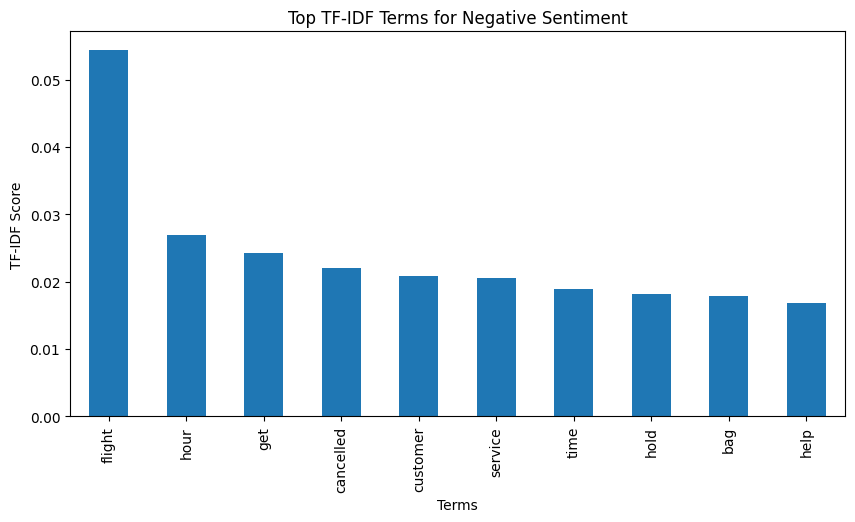

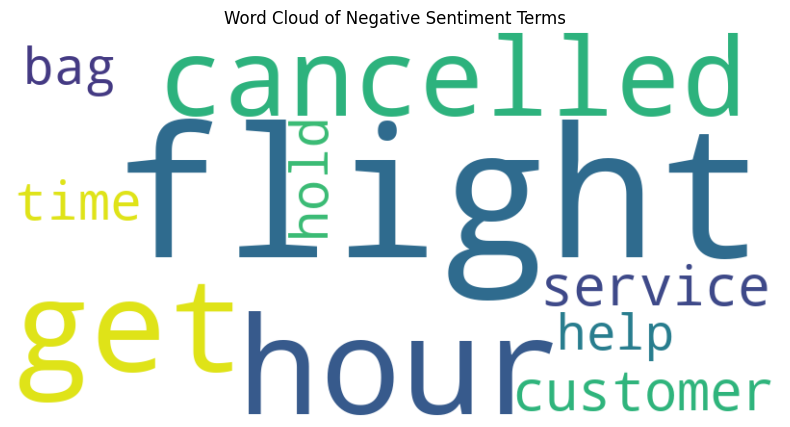

In [8]:
# ===============================
# 1. IMPORT REQUIRED LIBRARIES
# ===============================
import pandas as pd
import re
import nltk
import matplotlib.pyplot as plt
import zipfile

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

from sklearn.feature_extraction.text import TfidfVectorizer
from wordcloud import WordCloud

# Download NLTK resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('punkt_tab')


# ===============================
# 2. LOAD DATASET
# ===============================
# Upload Tweets.csv to Colab before running

# Unzip the file if it's compressed
with zipfile.ZipFile('Tweets.csv.zip', 'r') as zip_ref:
    zip_ref.extractall('.')

df = pd.read_csv("Tweets.csv")

# Extract required columns
data = df[['text', 'airline_sentiment']]

# Keep only negative sentiment
negative_data = data[data['airline_sentiment'] == 'negative']


# ===============================
# 3. CLEAN TEXT DATA
# ===============================
def clean_text(text):
    text = text.lower()
    text = re.sub(r'http\S+', '', text)   # remove URLs
    text = re.sub(r'@\w+', '', text)      # remove mentions
    text = re.sub(r'#\w+', '', text)      # remove hashtags
    text = re.sub(r'[^a-z\s]', '', text)  # remove punctuation & numbers
    return text

negative_data['clean_text'] = negative_data['text'].apply(clean_text)


# ===============================
# 4. TOKENIZATION & STOPWORD REMOVAL
# ===============================
stop_words = set(stopwords.words('english'))

negative_data['tokens'] = negative_data['clean_text'].apply(word_tokenize)

negative_data['tokens'] = negative_data['tokens'].apply(
    lambda words: [w for w in words if w not in stop_words]
)


# ===============================
# 5. LEMMATIZATION
# ===============================
lemmatizer = WordNetLemmatizer()

negative_data['tokens'] = negative_data['tokens'].apply(
    lambda words: [lemmatizer.lemmatize(w) for w in words]
)

# Convert tokens back to sentence
negative_data['final_text'] = negative_data['tokens'].apply(
    lambda x: " ".join(x)
)


# ===============================
# 6. COMPUTE TF-IDF
# ===============================
tfidf = TfidfVectorizer(max_features=1000)
tfidf_matrix = tfidf.fit_transform(negative_data['final_text'])

tfidf_df = pd.DataFrame(
    tfidf_matrix.toarray(),
    columns=tfidf.get_feature_names_out()
)

print("TF-IDF Matrix Shape:", tfidf_df.shape)


# ===============================
# 7. TOP TF-IDF TERMS (NEGATIVE)s
# ===============================
top_terms = tfidf_df.mean().sort_values(ascending=False).head(10)
print("\nTop TF-IDF Terms for Negative Sentiment:\n")
print(top_terms)


# ===============================
# 8. VISUALIZATION: BAR CHART
# ===============================
plt.figure(figsize=(10,5))
top_terms.plot(kind='bar')
plt.title("Top TF-IDF Terms for Negative Sentiment")
plt.xlabel("Terms")
plt.ylabel("TF-IDF Score")
plt.show()


# ===============================
# 9. VISUALIZATION: WORD CLOUD
# ===============================
wordcloud = WordCloud(
    width=800,
    height=400,
    background_color='white'
).generate_from_frequencies(top_terms)

plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Word Cloud of Negative Sentiment Terms")
plt.show()